## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# \ is used as line break for the code, for readability
df.query("group == 'control' and landing_page =='new_page'").shape[0] +\
df.query("group == 'treatment' and landing_page =='old_page'").shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#This is the new expected number of rows after removing the messy data
df.shape[0]-(# \ is used as line break for the code
df.query("group == 'control' and landing_page =='new_page'").shape[0] +\
df.query("group == 'treatment' and landing_page =='old_page'").shape[0])

290585

In [9]:
#Getting index of the rows where there is mismatch between group and landing page -1
df.query("group == 'control' and landing_page =='new_page'").index

Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
              1474,   1877,
            ...
            293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200,
            294253, 294331],
           dtype='int64', length=1928)

In [10]:
#Getting index of the rows where there is mismatch between group and landing page -2
df.query("group == 'treatment' and landing_page =='old_page'").index

Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=1965)

In [11]:
#dropping rows with mismatch between group and landing page, using 2 .drop consequently
df2 = df.drop(index=df.query("group == 'control' and landing_page =='new_page'").index)\
.drop(index = df.query("group == 'treatment' and landing_page =='old_page'").index)

In [12]:
#Shape of the new dataframe after dopping
df2.shape[0]

290585

In [13]:
#Checking that there is no mismatch -1
df2.query("group == 'control' and landing_page =='new_page'")

,user_id,timestamp,group,landing_page,converted


In [14]:
#Checking that there is no mismatch -2
df2.query("group == 'treatment' and landing_page =='old_page'")

,user_id,timestamp,group,landing_page,converted


In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
(df2.user_id.value_counts())>1

773192     True
851104    False
688307    False
718297    False
838144    False
          ...  
755610    False
804629    False
837875    False
889019    False
715931    False
Name: user_id, Length: 290584, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [18]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
#Number of rows in the dataframe before removing duplicate
df2.shape[0]

290585

In [20]:
df2.drop(index = 1899,inplace = True)

In [21]:
#Number of rows in the dataframe after removing duplicate
df2.shape[0]

290584

In [22]:
#Displaying user 773192 info to make sure there is no duplication
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
# .mean() is used since we just want to calculate the average of the 1 and 0 - this is the probability of conversion
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on probability alone, the probability of conversion for the control group is higher than probability of conversion in the treatment group, indicating that the old page is better. It is not enough evidence since it could have happened by chance. We would still need to do A/B testing (hypothesis testing) next.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{new}$** - **$p_{old}$** <= 0 <br>
**$H_{1}$**: **$p_{new}$** - **$p_{old}$** > 0 <br>

The null hypothesis is that converted rate for the old page is as good as or better than the new page. <br>
The alternative hypothesis is that the converted rate for the new page is better than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
p_new = df2.converted.mean() #Under the null, conversion rate for old and new are the same regardless of the page
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
p_old = df2.converted.mean() #Under the null, conversion rate for old and new are the same regardless of the page
p_old

0.11959708724499628

c. What is $n_{new}$?

In [29]:
#Sample size for treatment group
n_new = df2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [30]:
#Sample size for control group
n_old = df2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
#generating a random sample of 0 and 1 based on the probabilities under the null, for the new page
#for the sample size of the treatment
new_page_converted = np.random.choice([0,1],p=(1-p_new,p_new),size = n_new) 
new_page_converted.mean()

0.11973711375679581

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
#generating a random sample of 0 and 1 based on the probabilities under the null, for the old page
#for the sample size of the control
old_page_converted = np.random.choice([0,1],p=(1-p_old,p_old),size = n_old)
old_page_converted.mean()

0.12050332475184823

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
p_new_minus_p_old = new_page_converted.mean() - old_page_converted.mean()

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = [] #Empty list to store the values
for i in range(10000): #simulating 10,000 samples of old and treatment and calculating their differences in p_diffs
    old_page_converted2 = np.random.choice([0,1],p=(1-p_old,p_old),size = n_old) #same as 'f', utilizing 'b' and 'd'
    new_page_converted2 = np.random.choice([0,1],p=(1-p_new,p_new),size = n_new) #same as 'e', utilizing 'a' and 'c'
    p_diffs.append(new_page_converted2.mean() - old_page_converted2.mean()) #same as 'g'

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

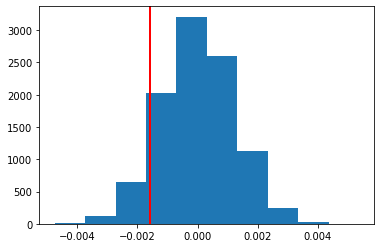

In [35]:
p_diffs = np.array(p_diffs) #converting the list to numpy array
plt.hist(p_diffs); #plotting histogam of diffs

#calculating the actual difference observed in ab_data.csv
actual_diff = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
plt.axvline(actual_diff,color = 'r', linewidth = 2); #adding vertical line for actual_diff

**It looks like it has a normal distribution which is what is expected, according to Central Limit Theorem.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
#probability that p_diffs is larger than the actual difference observed in the dataset
(p_diffs > actual_diff).mean()

0.906

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**p-value was calculated which is the probability of type 1 error, which is the worst type of error that we want to always avoid. Type 1 error is choosing the alternative when the null is true. The high p value indicates that there is a high probability of type 1 error if we reject the null hypothesis. The conclusion drawn here is that we fail to reject the null hypothesis, therefore, the old page is as good as or better than the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

**$H_{0}$**: **$p_{new}$** - **$p_{old}$** <= 0 <br>
**$H_{1}$**: **$p_{new}$** - **$p_{old}$** > 0 <br>

The null hypothesis is that converted rate for the old page is as good as or better than the new page. <br>
The alternative hypothesis is that the converted rate for the new page is better than the old page.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0] #number of successes or conversions for the control
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]#number of successes or conversions for the treatment
n_old = df2.query('group == "control"').shape[0] #size of control sample
n_new = df2.query('group == "treatment"').shape[0] #size of treatment sample

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [38]:
import stats
sm.stats.proportions_ztest(count = [convert_new,convert_old], nobs= [n_new,n_old], value = 0 ,alternative = 'larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value is higher than 0.05 so we fail to reject the null. Thus, the conversion rate for the old page is as good as or higher than the new page. The z-score of -1.31 means that the proportion difference is 1.31 standard deviations below the mean - difference in proportion being negative means that proportion of new is less than proportion of old as per the hypotheses stated before. <br>
This is consistent with the findings from the above method (parts j and k). The conclusion is the same and the p-values are very close.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#Creating dummy column for "group"
group_dummy = pd.get_dummies(df['group'])
df2 = df2.join(group_dummy)

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [41]:
#Renaming the treatment column to ab_page, such that value is 1 if treatment and 0 if control
df2.rename(columns = {'treatment':'ab_page'},inplace = True)

In [42]:
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [43]:
#Creating intercept column
df2['intercept'] = 1

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
#Logistic regression model to predict conversion rate, based on intercept and ab_page
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-17 17:54 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The null hypothesis is that the coefficient of ab_page is equal to zero. The alternative hypothesis is that the coefficient of ab_page is not equal to zero. <br> 
The p-value associated with ab_page is 0.1899, which is higher than 0.05. This means that ab_page is statistically insignificant, and we fail to reject the null - fail to reject that the coefficient of ab_page is zero.<br>
A final point is that we reach the same conclusion from hypothesis testing, that conversion rate for the new page is less than that of the old page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factors to add to the regression model since other factors may be statistically significant, and have an affect on conversion rate. <br>
The disadvantage is that significance level goes down as more factors are added, thus increasing the probability of type 1 error (Multiple Comparison Problem). One way of dealing with this is by using Bonferroni correction, to adjust the alpha.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1


In [49]:
### Create the necessary dummy variables
country_dummy = pd.get_dummies(df_new['country'])
df_new = df_new.join(country_dummy)

In [50]:
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1,0


In [51]:
#Logistic regression model to predict conversion rate, based on intercept and countries
lm = sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2022-03-17 17:54 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**Looking at country and conversion rate, it looks like P-values are higher than 0.05, so we fail to reject the null. This means that country is statistically insignificant**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
#Creating higher order terms for the interaction between page and country
df_new['UK_interaction'] = df_new['UK'] * df_new['ab_page']
df_new['US_interaction'] = df_new['US'] * df_new['ab_page']

In [54]:
### Fit Your Linear Model And Obtain the Results
lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US','UK_interaction','US_interaction']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-03-17 17:57 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -2.0040   0.0364 -55.0077 0.0000 -2.0754 -1.9326
ab_page           -0.0674   0.0520  -1.2967 0.1947 -0.1694  0.0345
UK                 0.0118   0.0398   0.2957 0.7674 -0.0663  0.0899
US                 0.0175   0.0377   0.4652 0.6418 -0.0563  0.0914
UK_interaction     0.0783   0.0568   1.3783 0.1681 -0.0330  0.1896
US_interaction     0.0469   0.0538   0.8718 0.3833 -0.0585  0.1523
==================================================================

"""

**We still reach the same conclusion when including ab_page. It looks like P-values are higher than 0.05, so we fail to reject the null. This means that country, ab_page as well are their interactions are statistically insignificant.**

<a id='conclusions'></a>
## Conclusions

All three methods used in this project reach the same conclusion in their own way - which is that the conversion rate for the old page is as good as or better than the old page.<br>
In the first method (probability), the probability of conversion for the old page was higher than the new page.<br> 
In the second method (hypothesis testing), we failed to reject the null which is that the conversion rate for the old page is as good as or better than the new page.<br> 
In the third and final method (regression), we failed to reject the null, which is that the coefficient for the ab_page (treatment) is equal to zero. It was statistically insignificant.